# Révision - Analyse de données sur les ventes d'une librairie

# 0 - contexte et objectifs

Vous travaillez au service marketing de Lapage, une grande librairie généraliste en ligne.

Lapage était originellement une librairie physique avec plusieurs points de vente. 
Mais devant le succès de certains de ses produits et l’engouement de ses clients, 
elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne. Vous intervenez car l’entreprise souhaite faire le point : analyser ses points forts, ses points faibles, les comportements clients, etc. Par exemple, elle cherche à savoir si elle doit créer certaines offres, adapter certains prix, etc.

On vous demande de faire une analyse en deux parties :

Partie I - analyse des différents indicateurs généraux

    Construire des indicateurs et graphiques autour du chiffre d'affaires. Rregarder l’évolution dans le temps
    faire un zoom sur les références, pour voir les tops et les flops, la répartition par catégorie, etc.
    etudier les profils des clients, et également la répartition du chiffre d'affaires entre eux

Partie II - comportement des clients l’objectif est cette fois-ci de comprendre le comportement des clients en ligne.

    étudier le lien entre le genre d’un client et les catégories des livres achetés
    étudier ensuite le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.



# 1 - Exploration et  nettoyage des données 

In [1]:
# Import de la librairie Pandas
import pandas as pd

# Import de la librairie matplotlib
import matplotlib.pyplot as plt

## 1.1 - Chargement des données

Si vous utilisez anaconda -> je vous conseille de mettre les fichiers csv dans le même répertoire que le notebook

Si vous utilisez google colab ->  il faut exécuter le code ci-dessous. 

from google.colab import files
data_to_load = files.upload()

### 1.1.1 - customers

In [2]:
# Ouverture du fichier
customers = pd.read_csv('customers.csv')

In [3]:
# Affichage des informations 
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
# Affichage des premières lignes

customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
# Stats du dataframe
customers.describe(include = 'all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


Ce fichier comprend 3 colonnes :

    Client_id : référence de chaque client
    Sex : le genre du client
    Birth : l'année de naissance du client



In [6]:
#valeurs manquantes
customers.isna().mean()

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

In [7]:
#Doublon
customers.duplicated().sum()

0

In [8]:
print("Il y a", customers.describe(include = 'all').loc["unique","client_id"], "clients uniques")

Il y a 8623 clients uniques


In [9]:
print("L'age moyen est :", 2022- round(customers.describe(include = 'all').loc["mean","birth"]), "ans")

L'age moyen est : 44 ans


In [10]:
print("La part des femmes :", round(customers.describe(include = 'all').loc["freq","sex"] / 
      customers.describe(include = 'all').loc["count","sex"],2), "%")

La part des femmes : 0.52 %


In [11]:
#calculons l'age moyen par sexe 

2022 - customers.groupby("sex").mean()

,birth
sex,
f,44.005121
m,43.408277


Le fichier customers n'a pas de valeurs nulles ni de doublons.


### 1.1.2 - products

In [12]:
# Ouverture du fichier
products = pd.read_csv('products.csv')


In [13]:
# Affichage des informations 

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [14]:
# Affichage des premières lignes
products.head()


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [15]:
#valeurs manquantes

products.isna().mean()

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

In [16]:
#Doublon

products.duplicated().sum()

0

In [17]:
# Stats du dataframe
products.describe(include="all")


,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


Votre conclusion ?



In [18]:
# calculer le prix moyen des produits par catégorie

products.groupby("categ").mean()

,price
categ,
0,11.727280
1,25.531421
2,108.354686


### 1.1.3 - transactions


In [19]:
# Ouverture du fichier
transactions = pd.read_csv('transactions.csv')

In [20]:
# Affichage des informations 
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [21]:
# Stats du dataframe
transactions.describe(include="all")

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [22]:
#valeurs manquantes
transactions.isna().mean()

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [23]:
#Doublon
transactions.duplicated().sum()


126

In [24]:
transactions [transactions.duplicated()]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Votre conclusion ?

Qu'est-ce qu'on remarque ? 

Il s'agit de données de tests réalisés probablement lors de la mise en service 



In [25]:
# Calcul du nombre de sessions test.
transactions.date.str.startswith('test').sum()

200

In [26]:
# retirer les lignes identifiées


transactions = transactions[transactions.date.str.startswith('test') == False]

In [27]:
transactions[transactions.id_prod == "T_0" ]

,id_prod,date,session_id,client_id


In [28]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [29]:
# Calculer le nombre d'achats par client avec groupby et calculer ensuite le nombre d'achats moyen
transactions.groupby("client_id").session_id.nunique()


client_id
c_1       33
c_10      34
c_100      5
c_1000    93
c_1001    47
          ..
c_995      9
c_996     79
c_997     24
c_998     23
c_999     42
Name: session_id, Length: 8600, dtype: int64

In [30]:
print("le nombre d'achat moyen par client :", transactions.groupby("client_id").session_id.nunique().mean())

le nombre d'achat moyen par client : 39.80406976744186


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1cd91fd00>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1cd93b3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1cd91fa30>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1cd93b6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1cd93b970>],
 'means': []}

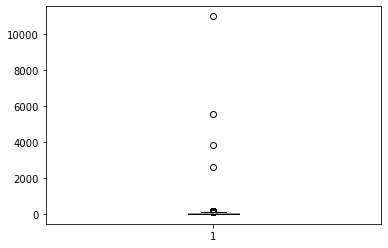

In [31]:
# tracer un boxplot pour voir la distribution, voux pouvez utiliser plt.boxplot()

plt.boxplot(transactions.groupby("client_id").session_id.nunique())

Qu'est-ce qu'on remarque ? 


La présence d'outlier

## 1.2 - Jointure des dataframes

1.2.1 - products & transactions

In [32]:
# Jointure entre transactions et products en prenant comme clé la colonne 'id_prod'
# jointure externe 
# afin de conserver toutes les lignes de mon fichier transactions.

df_final = pd.merge(transactions,products, on = 'id_prod', how= 'outer', indicator = True)

In [33]:
#regardons les cas où le produit n'est pas vendu

df_final[df_final._merge=="right_only"]

,id_prod,date,session_id,client_id,price,categ,_merge
679332,0_1016,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaN,NaN,NaN,1.67,0.0,right_only
679334,T_0,NaN,NaN,NaN,-1.00,0.0,right_only
679335,0_1062,NaN,NaN,NaN,20.08,0.0,right_only
679336,0_1119,NaN,NaN,NaN,2.99,0.0,right_only
679337,0_1014,NaN,NaN,NaN,1.15,0.0,right_only
679338,1_0,NaN,NaN,NaN,31.82,1.0,right_only
679339,0_1318,NaN,NaN,NaN,20.92,0.0,right_only
679340,0_1800,NaN,NaN,NaN,22.05,0.0,right_only
679341,0_1645,NaN,NaN,NaN,2.99,0.0,right_only


In [34]:
print("les produits qui ne sont pas vendus",df_final[df_final._merge=="right_only"].id_prod.unique())

les produits qui ne sont pas vendus ['0_1016' '0_1780' 'T_0' '0_1062' '0_1119' '0_1014' '1_0' '0_1318'
 '0_1800' '0_1645' '0_322' '0_1620' '0_1025' '2_87' '1_394' '2_72' '0_310'
 '0_1624' '2_86' '0_299' '0_510' '0_2308']


In [35]:
#on supprime les produits invendus

index = df_final[df_final._merge=="right_only"].index

df_final.drop(index, inplace = True)

In [36]:
#regardons les cas où le produit dans transaction n'est pas trouvé dans products
df_final[df_final._merge=="left_only"]

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only
...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,left_only
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,left_only
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,left_only
542779,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,left_only


In [37]:
df_final[df_final._merge=="left_only"].describe(include = "all")

,id_prod,date,session_id,client_id,price,categ,_merge
count,221,221,221,221,0.0,0.0,221
unique,1,221,221,100,NaN,NaN,1
top,0_2245,2022-09-23 07:22:38.636773,s_272266,c_1533,NaN,NaN,left_only
freq,221,1,1,6,NaN,NaN,221
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Un produit a été vendu 221 fois, mais on ne connait pas son prix.
Plusieurs possibilités : 

    - on supprime les lignes -> on sous-estimera le CA
    
    - on fait une imputation 

In [38]:
# faisons une imputation 

index = df_final[df_final._merge=="left_only"].index #on récupère l'index des lignes qu'il faut modifier 

df_final.loc[index,"price"] = 11.7

df_final.loc[index,"categ"] = 0


In [39]:
df_final[df_final._merge=="left_only"]

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,11.7,0.0,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,11.7,0.0,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,11.7,0.0,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,11.7,0.0,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,11.7,0.0,left_only
...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,11.7,0.0,left_only
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,11.7,0.0,left_only
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,11.7,0.0,left_only
542779,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,11.7,0.0,left_only


### 1.2.1 - ajout de customers

In [40]:
# faire la jointure 

df_final = pd.merge(df_final,customers, on = 'client_id', how= 'outer', indicator = "_merge_2")

In [41]:
# Vérifier si des ventes concernent des clients absents de customers 

df_final[df_final._merge_2=="left_only"]

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2


In [42]:
# Vérifier si des clients n'ont fait aucun achat

df_final[df_final._merge_2=="right_only"]

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2
679332,NaN,NaN,NaN,c_8253,NaN,NaN,NaN,f,2001,right_only
679333,NaN,NaN,NaN,c_3789,NaN,NaN,NaN,f,1997,right_only
679334,NaN,NaN,NaN,c_4406,NaN,NaN,NaN,f,1998,right_only
679335,NaN,NaN,NaN,ct_0,NaN,NaN,NaN,f,2001,right_only
679336,NaN,NaN,NaN,c_2706,NaN,NaN,NaN,f,1967,right_only
679337,NaN,NaN,NaN,c_3443,NaN,NaN,NaN,m,1959,right_only
679338,NaN,NaN,NaN,c_4447,NaN,NaN,NaN,m,1956,right_only
679339,NaN,NaN,NaN,c_3017,NaN,NaN,NaN,f,1992,right_only
679340,NaN,NaN,NaN,c_4086,NaN,NaN,NaN,f,1992,right_only
679341,NaN,NaN,NaN,c_6930,NaN,NaN,NaN,m,2004,right_only


In [43]:
#liste des clients sans achat
df_final[df_final._merge_2=="right_only"].client_id.unique()

array(['c_8253', 'c_3789', 'c_4406', 'ct_0', 'c_2706', 'c_3443', 'c_4447',
       'c_3017', 'c_4086', 'c_6930', 'c_4358', 'c_8381', 'c_1223',
       'c_6862', 'c_5245', 'c_5223', 'c_6735', 'c_862', 'c_7584', 'c_90',
       'c_587', 'ct_1', 'c_3526'], dtype=object)

In [44]:
#on enlève les lignes avec ces clients 

df_final = df_final[df_final._merge_2=="both"]

# 2 Analyse globale du CA

In [45]:
df_final.head()

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,both
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,both
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,both


In [46]:
# calculer le CA total
df_final.price.sum()


11856314.38

In [47]:
print ("le CA total : ", round(df_final.price.sum()/1000000,1), "millions")

le CA total :  11.9 millions


## 2.1 Traitement de la date

On aimerait pouvoir faire des analyses du CA par an, par mois, par jour de la semaine, par catégorie de produit.
On s'occupera des analyses des usages de clients dans le chapitre 3 

On a besoin de traiter la date pour pouvoir faire ces analyses. 
On va créer des nouvelles colonnes à parti de ce champ

In [48]:
# Modification du type de ma colonne date
df_final['date'] = pd.to_datetime(df_final['date'])

In [49]:
df_final['année'] = df_final['date'].dt.year

In [50]:
df_final.head()

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2,année
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,both,2022
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,both,2021
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,both,2022
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,both,2022
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,both,2021


En vous inspirant de ce qu'on vient de faire, créer :

    un champ mois

    un champ jour du mois

    un champ jour de la semaine


In [51]:
# A vous de jouer
df_final['année'] = df_final['date'].dt.year
df_final['mois'] = df_final['date'].dt.month
df_final['jour'] = df_final['date'].dt.day
df_final['jour_sem'] = df_final['date'].dt.day_of_week

In [52]:
df_final.head()

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2,année,mois,jour,jour_sem
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,both,2022,5,20,4
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,both,2021,7,20,1
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,both,2022,8,20,5
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,both,2022,6,18,5
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,both,2021,8,18,2


## 2.2 Analyse calendaire

In [53]:
#Calcule du CA par année
df_final.groupby("année").price.sum()

année
2021    4771844.46
2022    6110085.81
2023     974384.11
Name: price, dtype: float64

<AxesSubplot:title={'center':'CA par année'}, xlabel='année', ylabel='CA'>

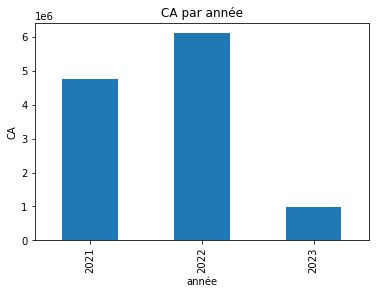

In [54]:
df_final.groupby("année").price.sum().plot(kind = "bar", title="CA par année",ylabel="CA")

En vous inspirant de ce qu'on vient de faire :

- Etudier le CA par mois. Qu'observons nous ? 

- Est-ce qu'il y a un effet fin de mois ? ou début de mois ?

- Est-ce qu'il y a un effet WE? 





<AxesSubplot:title={'center':'Evolution du CA'}, xlabel='année,mois', ylabel='€'>

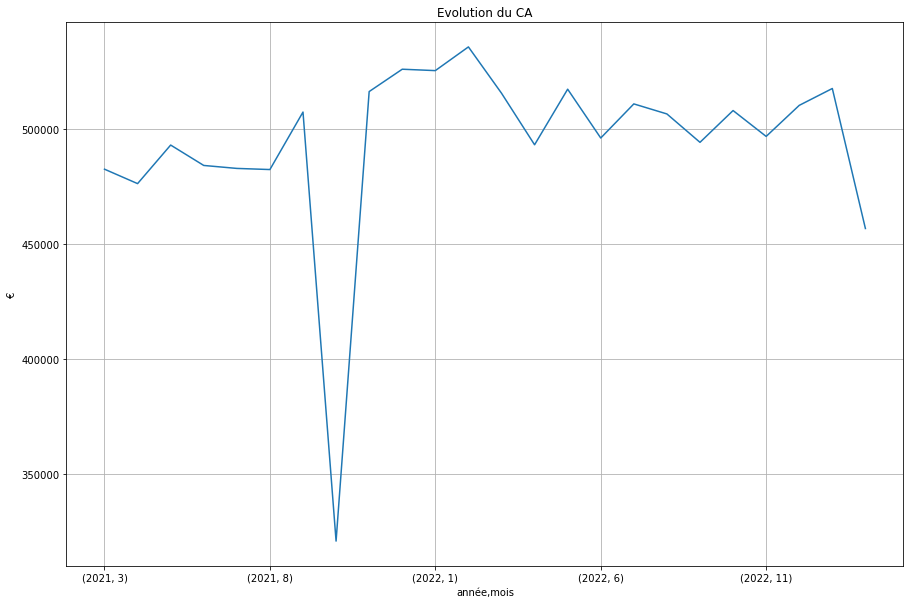

In [55]:
# A vous de jouer
df_final.groupby(["année", "mois"]).price.sum().plot(title="Evolution du CA",ylabel="€",figsize =(15,10), grid=True)




In [56]:
df_final.groupby(["année", "mois"]).price.sum()

année  mois
2021   3       482545.91
       4       476273.10
       5       493037.07
       6       484170.46
       7       482882.20
       8       482390.09
       9       507381.08
       10      320880.64
       11      516284.73
       12      525999.18
2022   1       525397.49
       2       535700.20
       3       515585.23
       4       493162.74
       5       517319.80
       6       496098.02
       7       510923.52
       8       506560.87
       9       494219.83
       10      508034.77
       11      496793.64
       12      510289.70
2023   1       517622.45
       2       456761.66
Name: price, dtype: float64

Il y a eu une chute de CA importante en octobre 2021

<AxesSubplot:title={'center':"nombre d'achats moyen par jour du mois"}, xlabel='jour'>

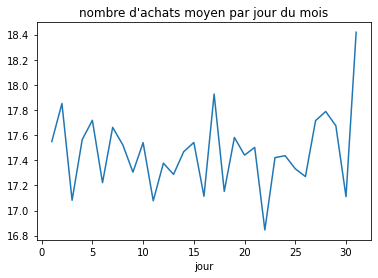

In [57]:
df_final.groupby("jour").price.mean().plot(title ="nombre d'achats moyen par jour du mois")

<AxesSubplot:xlabel='jour'>

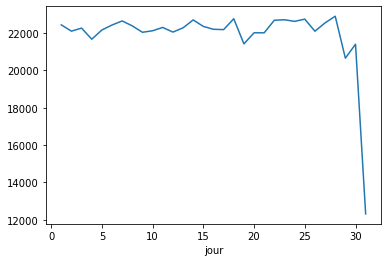

In [58]:
df_final.groupby("jour").price.count().plot()

Il ne semble pas y avoir d'effet fin de mois ou début de mois

<AxesSubplot:title={'center':"nombre d'achats moyen par jour de semaine"}, xlabel='jour_sem'>

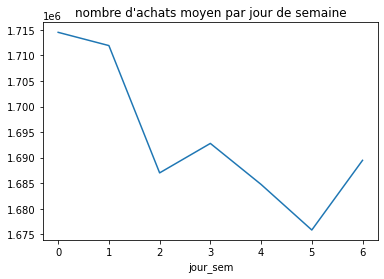

In [59]:
df_final.groupby("jour_sem").price.sum().plot(title ="nombre d'achats moyen par jour de semaine")

<AxesSubplot:title={'center':"nombre d'achats moyen par jour de semaine"}, xlabel='jour_sem'>

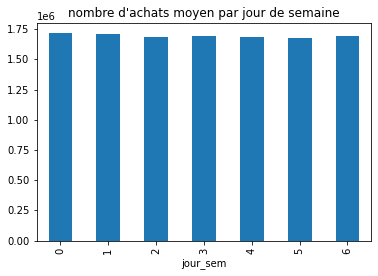

In [60]:
df_final.groupby("jour_sem").price.sum().plot(kind = "bar",title ="nombre d'achats moyen par jour de semaine")

Le CA généré en début de semaine est légérement supérieur.

## 2.3 Analyse par catégorie



In [61]:
# reprendre le travail ci-dessous et le détailler par categorie



tcd_mois = pd.pivot_table(df_final, index = ['année','mois'], columns = 'categ', values = 'price',aggfunc={'price':'sum'})

In [62]:
tcd_mois

categ             0.0        1.0        2.0
année mois                                 
2021  3     193734.47  186974.17  101837.27
      4     205386.26  156138.35  114748.49
      5     196280.32  165893.40  130863.35
      6     168025.05  189162.04  126983.37
      7     144797.59  188523.27  149561.34
      8     167842.92  162991.38  151555.79
      9     246494.31  190613.78   70272.99
      10    199332.73   33762.32   87785.59
      11    156026.56  252910.39  107347.78
      12    206118.14  251026.75   68854.29
2022  1     164269.01  256267.92  104860.56
      2     183326.03  213120.64  139253.53
      3     191593.64  206485.26  117506.33
      4     175161.06  195263.97  122737.71
      5     195059.54  205532.63  116727.63
      6     184016.76  201912.06  110169.20
      7     187237.40  193969.72  129716.40
      8     177466.36  211360.09  117734.42
      9     183434.54  195379.54  115405.75
      10    187546.17  199609.66  120878.94
      11    184723.05  200427.99  111642.60
      12    180540.90  205945.71  123803.09
2023  1     181364.96  210104.41  126153.08
      2     162538.90  180347.24  113875.52

<AxesSubplot:title={'center':'Evolution du CA par mois et par catégorie'}, xlabel='année,mois'>

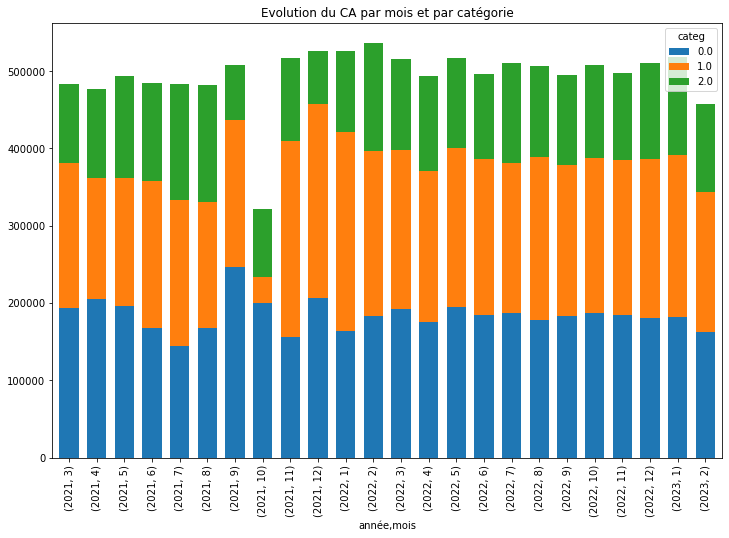

In [63]:
tcd_mois.plot(kind='bar',stacked = True,figsize=(12,8),width = 0.7, title ='Evolution du CA par mois et par catégorie')

In [64]:
tcd_jour =pd.pivot_table(df_final, index = ['jour'], columns = 'categ', values = 'price',aggfunc={'price':'mean'})

In [65]:
tcd_jour

categ,0.0,1.0,2.0
jour,,,
1,10.679480,20.643511,75.232226
2,10.499528,20.677506,76.120829
3,10.493009,20.413034,78.745745
4,10.574564,20.349701,75.547022
5,10.617124,20.412316,75.353201
6,10.493971,20.407424,75.429562
7,10.677472,20.520463,78.765705
8,10.661957,20.670449,78.472537
9,10.702865,20.451171,76.780843


<AxesSubplot:title={'center':'Evolution du CA par jour du mois et par catégorie'}, xlabel='jour'>

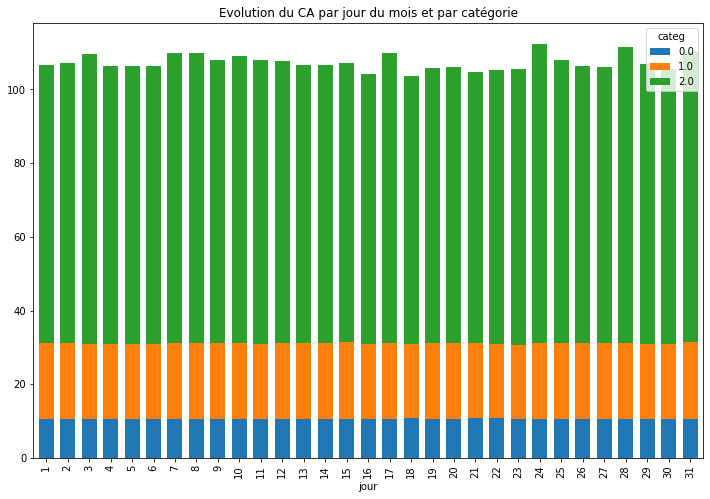

In [66]:
tcd_jour.plot(kind='bar',stacked = True,figsize=(12,8),width = 0.7, title ='Evolution du CA par jour du mois et par catégorie')

In [67]:
tcd_jour_sem =pd.pivot_table(df_final, index = ['jour_sem'], columns = 'categ', values = 'price',aggfunc={'price':'mean'})

<AxesSubplot:title={'center':'Evolution du CA par jour de la semaine et par catégorie'}, xlabel='jour_sem'>

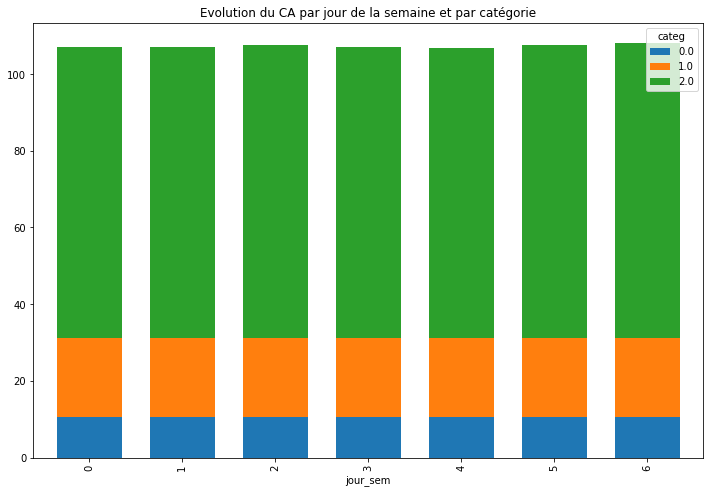

In [68]:
tcd_jour_sem.plot(kind='bar',stacked = True,figsize=(12,8),width = 0.7, title ='Evolution du CA par jour de la semaine et par catégorie')

# 3 Analyse des usages des clients

## 3.1 Traitement de l'âge 

In [69]:
#créons  une colonne âge
df_final['Age'] = 2022 - df_final['birth']

Text(0, 0.5, 'Nombre de clients')

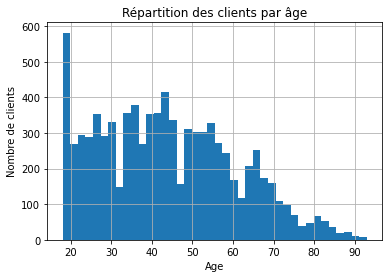

In [70]:
df_final.groupby("client_id").mean().Age.hist(bins=40)

plt.title("Répartition des clients par âge")

plt.xlabel("Age")

plt.ylabel("Nombre de clients")

On observe un pic très important de client pour l'âge de 18 ans 

Pour analyser les usages liés à l'âge, il est souvent plus pertinent de faire des tranches d'âge



In [71]:
# On va créer 14 intervalles d'âges :

labels = ['19-24','25-29','30-35','36-40','41-45','46-51','52-56','57-61','62-67','68-72','73-77','78-83','84-88','89-94']


df_final['Age_tranche']= pd.cut(df_final['Age'], 14,labels=labels)

In [72]:
df_final

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2,année,mois,jour,jour_sem,Age,Age_tranche
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,both,2022,5,20,4,36,36-40
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,both,2021,7,20,1,36,36-40
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,both,2022,8,20,5,36,36-40
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,both,2022,6,18,5,36,36-40
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,both,2021,8,18,2,36,36-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,both,f,2001,both,2021,7,23,4,21,19-24
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,both,f,1960,both,2022,3,25,4,62,62-67
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,both,f,1960,both,2021,9,25,5,62,62-67
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,both,m,1992,both,2021,3,11,3,30,30-35


## 3.2 Analyse du chiffre d'affaires par client

In [73]:
# le nombre de clients uniques
df_final.client_id.value_counts().shape

(8600,)

In [74]:
# on regroupe mes données par client_id et on calcul le montant de leurs achats.
df_client = df_final.groupby('client_id')[['price']].sum();
df_client.head()

,price
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86


Analyser le chiffre d'affaires par client : 

- est ce qu'il y a des outliers ? 
- si oui, quelle part du CA ils représentent ?
- que peut-on supposer à leur sujet ? Comment les traiter dans notre analyse 
- étudier la distribution du CA par client en dehors de ces clients

<AxesSubplot:>

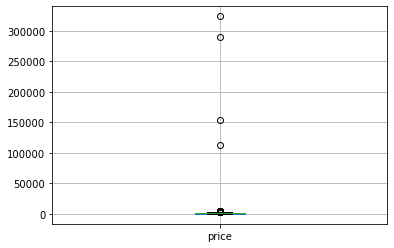

In [75]:
# A vous de jouer
df_client.boxplot()


In [76]:
df_client.sort_values('price', ascending = False)

,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153669.12
c_3454,113673.03
c_3263,5276.87
...,...
c_4648,11.20
c_240,11.06
c_8114,9.98


4 clients font un CA énorme par rapport aux autres 

In [77]:
CA_top4 = float(round(df_client.sort_values('price', ascending = False).head(4).sum(),2))

In [78]:
CA_top4

881135.84

In [79]:
print ("le CA généré par les 4 plus gros clients :",CA_top4 )

le CA généré par les 4 plus gros clients : 881135.84


In [80]:
CA_tot = round(df_client.price.sum(),2)

CA_tot

11856314.38

In [81]:
print ("Ces 4 clients représentent : ",round(CA_top4/CA_tot *100,2) , "% du CA" )

Ces 4 clients représentent :  7.43 % du CA


In [82]:
index = df_client.sort_values('price', ascending = False).head(4).index

In [83]:
df_client_non_pro = df_client.drop(index)

<AxesSubplot:>

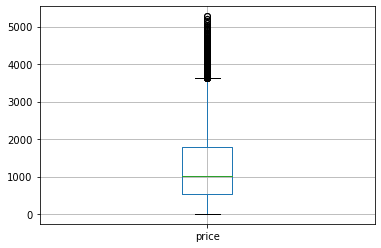

In [84]:
df_client_non_pro.boxplot()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

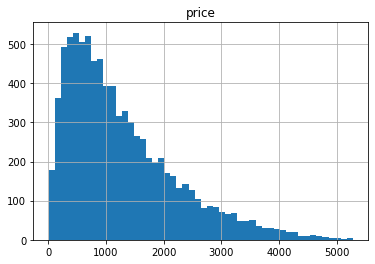

In [85]:
df_client_non_pro.hist(bins=50)

La distribution du CA par client non pro est plus classique

In [86]:
df_final = df_final[~df_final.client_id.isin(index)]

In [87]:
df_final

,id_prod,date,session_id,client_id,price,categ,_merge,sex,birth,_merge_2,année,mois,jour,jour_sem,Age,Age_tranche
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,both,f,1986,both,2022,5,20,4,36,36-40
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0.0,both,f,1986,both,2021,7,20,1,36,36-40
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0.0,both,f,1986,both,2022,8,20,5,36,36-40
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0.0,both,f,1986,both,2022,6,18,5,36,36-40
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0.0,both,f,1986,both,2021,8,18,2,36,36-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_147,2021-07-23 07:01:38.963669,s_65994,c_4391,181.99,2.0,both,f,2001,both,2021,7,23,4,21,19-24
679328,0_142,2022-03-25 18:07:25.880052,s_184472,c_1232,19.85,0.0,both,f,1960,both,2022,3,25,4,62,62-67
679329,0_142,2021-09-25 18:07:25.880052,s_95415,c_1232,19.85,0.0,both,f,1960,both,2021,9,25,5,62,62-67
679330,2_205,2021-03-11 00:11:32.016264,s_4605,c_7534,100.99,2.0,both,m,1992,both,2021,3,11,3,30,30-35


## 3.3 Analyse des usages d'achat liés au sexe

### 3.3.1 Calculer le CA par sexe

<AxesSubplot:ylabel='CA'>

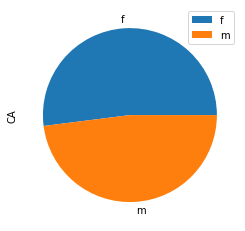

In [88]:
# A vous de jouer

df_final.groupby("sex").sum().price.plot(kind ="pie", ylabel="CA", legend =True)

### 3.3.2 Corrélation : Sexe et Catégorie

Les deux variables sont qualitatives.
On va réaliser le test du Khi² pour vérifier si ces deux variables sont liées.

In [89]:
# Création de ma table de contingence
X = "sex"
Y = "categ"

cont_1 = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

categ,0.0,1.0,2.0,Total
sex,,,,
f,200904,111331,16980,329215
m,186589,101017,15868,303474
Total,387493,212348,32848,632689


In [90]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(df_final)
indep = round(tx.dot(ty) / n)

In [91]:
indep

categ,0.0,1.0,2.0,Total
sex,,,,
f,201629.0,110494.0,17092.0,329215.0
m,185864.0,101854.0,15756.0,303474.0
Total,387493.0,212348.0,32848.0,632689.0


In [92]:
# regardons où l'écart est le plus important
(cont_1 - indep)/indep

categ,0.0,1.0,2.0,Total
sex,,,,
f,-0.003596,0.007575,-0.006553,0.0
m,0.003901,-0.008218,0.007108,0.0
Total,0.000000,0.000000,0.000000,0.0


In [93]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [94]:
chi2, p, dof, exp = chi2_contingency(cont_1)

In [95]:
chi2

20.200173796862927

In [96]:
p

0.002551063708568263

Avec une p-value inférieure à 0.05% on peut rejeter l'hypothèse 0 d'indépendance.

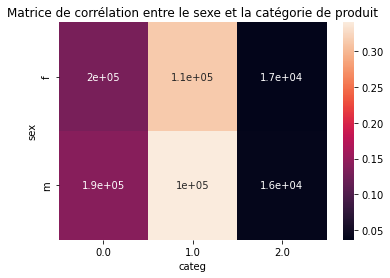

In [97]:
import seaborn as sns


c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

On remarque une forte corrélation entre les hommes et la catégorie 1.

### 3.3.3 Test de corrélation : sexe et nombre d'achats

In [98]:
nb_achats = df_final.groupby(["client_id","sex"],as_index=False)[["session_id"]].count()

array([<AxesSubplot:title={'center':'f'}>,
       <AxesSubplot:title={'center':'m'}>], dtype=object)

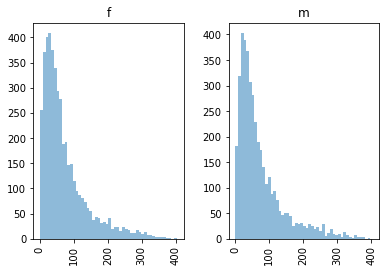

In [99]:
nb_achats[['sex','session_id']].hist(by='sex',alpha = 0.5, bins = 50, sharex=True)

In [100]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [101]:
lm = ols('session_id ~ sex', data = nb_achats).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)

In [102]:
table

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,6.660189e+01,66.601895,0.014453,0.904311
Residual,8594.0,3.960213e+07,4608.113532,NaN,NaN


In [103]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             session_id   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01445
Date:                Sun, 13 Nov 2022   Prob (F-statistic):              0.904
Time:                        15:38:08   Log-Likelihood:                -48452.
No. Observations:                8596   AIC:                         9.691e+04
Df Residuals:                    8594   BIC:                         9.692e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.5183      1.014     72.473      0.000      71.530      75.507
sex[T.m]       0.1762      1.466      0.120      0.904      -2.697       3.049
==============================================================================
Omnibus:                     2829.583   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8012.605
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                       6.156   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le nombre d'achats n'est pas corrélé au sexe

## 3.4 Analyse des usages d'achat liés à l'âge¶

### 3.4.1 Corrélation âge et CA

On peut considérer l'âge comme une variable quantitative. Le CA l'est aussi. 

In [104]:
df_age_ca = df_final[['Age','price']]

In [105]:
df_age_ca = df_age_ca.groupby('Age').agg({'price':'sum'}).reset_index()

In [106]:
df_age_ca

,Age,price
0,18,609013.69
1,19,178195.78
2,20,184212.45
3,21,178497.70
4,22,165031.38
...,...,...
71,89,5266.05
72,90,5043.19
73,91,2815.45
74,92,4013.87


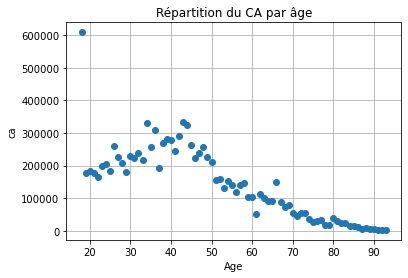

In [107]:
import matplotlib.pyplot as plt

plt.plot(df_age_ca["Age"],df_age_ca["price"],'o')
plt.xlabel("Age")
plt.ylabel("ca")
plt.grid()
plt.title('Répartition du CA par âge')
plt.show()

La correlation n'est pas complétement linéaire. Dans ce cas, il vaut mieux utiliser spearman.

In [200]:
#corrélation de pearson 
df_age_ca.corr()

,Age,price
Age,1.000000,-0.830594
price,-0.830594,1.000000


In [109]:
#test sperman
from scipy import stats
from scipy.stats import spearmanr

In [110]:
stats.spearmanr(df_age_ca['Age'],df_age_ca['price'])

SpearmanrResult(correlation=-0.8736842105263158, pvalue=7.352708223159905e-25)

la corrélation Spearmanr est plus forte.

In [111]:
df_age_ca.corr( method = "spearman")

,Age,price
Age,1.000000,-0.873684
price,-0.873684,1.000000


Il y a une forte corrélation en age et CA

### 3.4.2 corrélation tranche d'âge et catégorie de produit

In [112]:
# Création de ma table de contingence
X = 'Age_tranche'
Y = "categ"

cont_2 = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

categ,0.0,1.0,2.0,Total
Age_tranche,,,,
19-24,8601,14222,14997,37820
25-29,5813,9897,10763,26473
30-35,60527,21475,4441,86443
36-40,75737,23497,320,99554
41-45,83787,26260,450,110497
46-51,81656,25547,383,107586
52-56,19131,24421,402,43954
57-61,15614,20410,309,36333
62-67,15491,19485,349,35325


In [113]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_2.loc[:,["Total"]]
ty = cont_2.loc[["Total"],:]
n = len(df_final)
indep = round(tx.dot(ty) / n)

indep

categ,0.0,1.0,2.0,Total
Age_tranche,,,,
19-24,23163.0,12693.0,1964.0,37820.0
25-29,16213.0,8885.0,1374.0,26473.0
30-35,52942.0,29013.0,4488.0,86443.0
36-40,60972.0,33413.0,5169.0,99554.0
41-45,67674.0,37086.0,5737.0,110497.0
46-51,65891.0,36109.0,5586.0,107586.0
52-56,26920.0,14752.0,2282.0,43954.0
57-61,22252.0,12194.0,1886.0,36333.0
62-67,21635.0,11856.0,1834.0,35325.0


In [114]:
# regardons où l'écart est le plus important
(cont_2 - indep)/indep

categ,0.0,1.0,2.0,Total
Age_tranche,,,,
19-24,-0.628675,0.120460,6.635947,0.0
25-29,-0.641461,0.113900,6.833333,0.0
30-35,0.143270,-0.259815,-0.010472,0.0
36-40,0.242160,-0.296771,-0.938092,0.0
41-45,0.238097,-0.291916,-0.921562,0.0
46-51,0.239259,-0.292503,-0.931436,0.0
52-56,-0.289339,0.655437,-0.823839,0.0
57-61,-0.298310,0.673774,-0.836161,0.0
62-67,-0.283984,0.643472,-0.809706,0.0


In [115]:
chi2, p, dof, exp = chi2_contingency(cont_2)

In [116]:
chi2

242695.9059372266

In [117]:
p

0.0

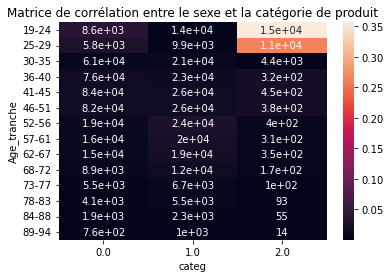

In [118]:
c = cont_2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le sexe et la catégorie de produit')
plt.show()

### 3.4.3 Corrélation âge et fréquence d'achat

In [166]:
df_freq_age = df_final.groupby(["Age_tranche","année","mois"]).agg({"client_id":"nunique",'session_id':"count"})

df_freq_age = pd.DataFrame(df_freq_age).reset_index()

In [172]:
df_freq_age ["nb_achats"] = df_freq_age ["session_id"]/ df_freq_age ["client_id"]

In [173]:
df_freq_age

,Age_tranche,année,mois,client_id,session_id,nd_achats,nb_achats
0,19-24,2021,1,0,0,NaN,NaN
1,19-24,2021,2,0,0,NaN,NaN
2,19-24,2021,3,563,1496,2.657194,2.657194
3,19-24,2021,4,573,1502,2.621291,2.621291
4,19-24,2021,5,597,1531,2.564489,2.564489
...,...,...,...,...,...,...,...
499,89-94,2023,8,0,0,NaN,NaN
500,89-94,2023,9,0,0,NaN,NaN
501,89-94,2023,10,0,0,NaN,NaN
502,89-94,2023,11,0,0,NaN,NaN


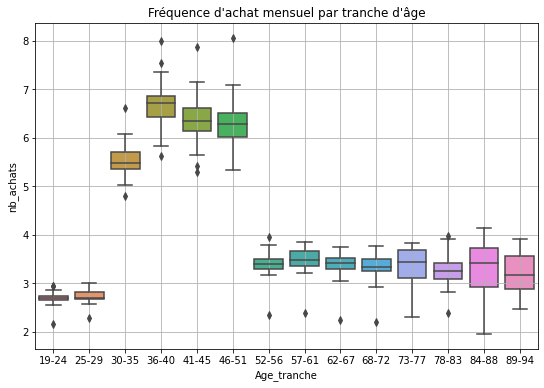

In [175]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='Age_tranche',y="nb_achats",data=df_freq_age, showfliers=True)
plt.title('Fréquence d\'achat mensuel par tranche d\'âge')
plt.grid()
plt.show()

In [176]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [180]:
lm = ols('nb_achats ~ Age_tranche', data = df_freq_age).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)

In [181]:
table

,df,sum_sq,mean_sq,F,PR(>F)
Age_tranche,13.0,648.147853,49.857527,326.958346,1.079755e-176
Residual,322.0,49.101434,0.152489,NaN,NaN


In [182]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nb_achats   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     327.0
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.08e-176
Time:                        16:15:39   Log-Likelihood:                -153.66
No. Observations:                 336   AIC:                             335.3
Df Residuals:                     322   BIC:                             388.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.6982      0.080     33.850      0.000       2.541       2.855
Age_tranche[T.25-29]     0.0340      0.113      0.302      0.763      -0.188       0.256
Age_tranche[T.30-35]     2.8213      0.113     25.028      0.000       2.600       3.043
Age_tranche[T.36-40]     3.9754      0.113     35.266      0.000       3.754       4.197
Age_tranche[T.41-45]     3.6594      0.113     32.463      0.000       3.438       3.881
Age_tranche[T.46-51]     3.6038      0.113     31.969      0.000       3.382       3.826
Age_tranche[T.52-56]     0.6938      0.113      6.154      0.000       0.472       0.916
Age_tranche[T.57-61]     0.7887      0.113      6.997      0.000       0.567       1.010
Age_tranche[T.62-67]     0.6700      0.113      5.943      0.000       0.448       0.892
Age_tranche[T.68-72]     0.6113      0.113      5.422      0.000       0.389       0.833
Age_tranche[T.73-77]     0.6661      0.113      5.909      0.000       0.444       0.888
Age_tranche[T.78-83]     0.5876      0.113      5.213      0.000       0.366       0.809
Age_tranche[T.84-88]     0.6310      0.113      5.598      0.000       0.409       0.853
Age_tranche[T.89-94]     0.5305      0.113      4.706      0.000       0.309       0.752
==============================================================================
Omnibus:                       29.384   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.192
Skew:                          -0.011   Prob(JB):                     3.25e-29
Kurtosis:                       6.061   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Avec un R_squared de 0.93, on peut dire qu'il existe à priori une relation entre l'âge et la fréquence d'achats.  

Avec un p-value inférieure à 0.05%, on peut rejeter l'hypothèse H0.

### 3.4.4 Corrélation âge et Panier moyen

In [189]:
df_panier_age = df_final.groupby(["Age_tranche","année","mois"]).agg({"price":"sum",'session_id':"count"})

df_panier_age = pd.DataFrame(df_panier_age).reset_index()

In [194]:
df_panier_age["panier"] = df_panier_age["price"] /df_panier_age["session_id"]

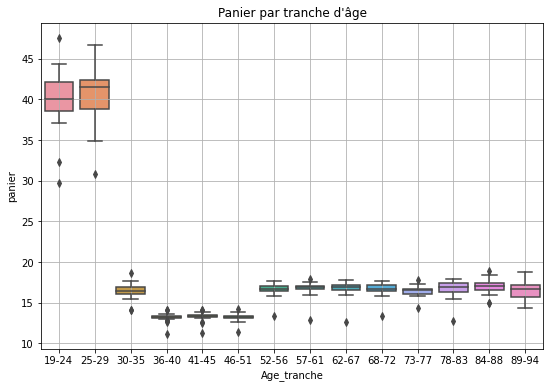

In [195]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='Age_tranche',y='panier',data=df_panier_age, showfliers=True)
plt.title('Panier par tranche d\'âge')
plt.grid()
plt.show()

In [197]:
lm_1 = ols('panier ~ Age_tranche', data = df_panier_age).fit()
import statsmodels.api; 
table_1 = sm.stats.anova_lm(lm_1)

In [198]:
table_1

,df,sum_sq,mean_sq,F,PR(>F)
Age_tranche,13.0,25473.846148,1959.526627,798.408848,4.773618e-236
Residual,322.0,790.281290,2.454290,NaN,NaN


In [199]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 panier   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     798.4
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          4.77e-236
Time:                        16:24:21   Log-Likelihood:                -620.45
No. Observations:                 336   AIC:                             1269.
Df Residuals:                     322   BIC:                             1322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               40.0058      0.320    125.103      0.000      39.377      40.635
Age_tranche[T.25-29]     0.7298      0.452      1.614      0.108      -0.160       1.620
Age_tranche[T.30-35]   -23.5523      0.452    -52.079      0.000     -24.442     -22.663
Age_tranche[T.36-40]   -26.8199      0.452    -59.304      0.000     -27.710     -25.930
Age_tranche[T.41-45]   -26.6922      0.452    -59.022      0.000     -27.582     -25.802
Age_tranche[T.46-51]   -26.7923      0.452    -59.243      0.000     -27.682     -25.903
Age_tranche[T.52-56]   -23.3152      0.452    -51.555      0.000     -24.205     -22.425
Age_tranche[T.57-61]   -23.2817      0.452    -51.480      0.000     -24.171     -22.392
Age_tranche[T.62-67]   -23.2397      0.452    -51.388      0.000     -24.129     -22.350
Age_tranche[T.68-72]   -23.3812      0.452    -51.701      0.000     -24.271     -22.492
Age_tranche[T.73-77]   -23.5471      0.452    -52.067      0.000     -24.437     -22.657
Age_tranche[T.78-83]   -23.2678      0.452    -51.450      0.000     -24.158     -22.378
Age_tranche[T.84-88]   -23.0152      0.452    -50.891      0.000     -23.905     -22.125
Age_tranche[T.89-94]   -23.5052      0.452    -51.975      0.000     -24.395     -22.615
==============================================================================
Omnibus:                      174.144   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3325.162
Skew:                          -1.682   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Avec un p-value inférieur à 0.05 %, on peut rejeter l'hypothèse H0 et un Eta² de 0.970 indique une forte corrélation entre les variables.

# 4 synthèse

- il y a légérement plus de femmes que d'hommes (52%)
- l'âge moyen des clients est 44 ans
- Il y a 3 catégories de produit avec des itervalles de prix bien distincts

price categ 

0 	11.727280

1 	25.531421

2 	108.354686

- les données de test (mise en service du site) ont été retirées de l'analyse 
- un produit de la catégorie 0 vendu plus de 200 fois ne possède pas de fiche produit. On lui a imputé le prix moyen de 11,7
- le chiffre d'affaires total depuis la mise en ligne est de 11,8 millions
- 4 clients pros génèrent plus de 7% de ce chiffre d'affaires. Pour pas biaiser les analyses, ces clients particuliers ont été retirés 
- en octobre 2021, on observe une chutte du CA due à la catégorie 1
- les produits de la catégorie 1 sont plus populaires chez les femmes
- les produits de la catégorie 2 sont très populaires chez les jeunes
- les fréquences d'achat sont plus importantes (2 fois) chez les 30 -50 ans
- le panier moyen est plus important chez les jeunes (plus de 2 fois)




In [ ]:
temp = df[df.indicator_name=='internet', :]

internet = df[df.indicator_name=='internet', "2020"]


inetenet[inetenet[2020].isna().index, ;] = temp[inetenet[2020].isna().index, "2019"]

